In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline


DIR = "./input/"

In [24]:
df_train = pd.read_csv(DIR+"train.csv",
                dtype={'PassengerId':np.int32,
                       'Survived':np.int32,
                       'Pclass':np.int32,
                       'Name':object,
                       'Sex':"category",
                       'Age':np.float32,
                       'SibSp':np.int32,
                       'Parch':np.int32,
                       'Ticket':object,
                       'Fare':np.float32,
                       'Cabin':object,
                       'Embarked':"category"})
df_train["data"] = "train"
df_test = pd.read_csv(DIR+"test.csv",
                      dtype={'PassengerId':np.int32,
#                        'Survived':np.int32,
                       'Pclass':np.int32,
                       'Name':object,
                       'Sex':"category",
                       'Age':np.float32,
                       'SibSp':np.int32,
                       'Parch':np.int32,
                       'Ticket':object,
                       'Fare':np.float32,
                       'Cabin':object,
                       'Embarked':"category"})
df_test["data"] = "test"

In [25]:
df = pd.concat((df_train,df_test))
df.reset_index(inplace=True)

In [26]:
df.head()

,index,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,data
0,0,22.0,NaN,S,7.250000,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,train
1,1,38.0,C85,C,71.283302,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,train
2,2,26.0,NaN,S,7.925000,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,train
3,3,35.0,C123,S,53.099998,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,train
4,4,35.0,NaN,S,8.050000,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,train


In [79]:
df.corr()

,PassengerId,Age,Parch,Pclass,SibSp,Survived,male,Q,S,B,C,D,E,F,G,N,T
PassengerId,1.000000,0.025799,0.008942,-0.038354,-0.055224,-0.005007,0.013406,0.011585,-0.047923,0.015895,0.006092,0.000549,-0.008136,0.000306,-0.045949,0.000208,-0.023049
Age,0.025799,1.000000,-0.125851,-0.377908,-0.189972,-0.064910,0.053663,-0.031132,-0.051625,0.118935,0.172404,0.135830,0.109768,-0.071439,-0.084016,-0.281124,0.033215
Parch,0.008942,-0.125851,1.000000,0.018322,0.373587,0.081629,-0.213125,-0.100943,0.073258,0.073051,0.009601,-0.027385,0.001084,0.020481,0.058325,-0.036806,-0.012304
Pclass,-0.038354,-0.377908,0.018322,1.000000,0.060832,-0.338481,0.124617,0.230491,0.096335,-0.353414,-0.430044,-0.265341,-0.225649,0.013122,0.052133,0.713857,-0.042750
SibSp,-0.055224,-0.189972,0.373587,0.060832,1.000000,-0.035322,-0.109609,-0.048678,0.075198,-0.011569,0.048616,-0.015727,-0.027180,-0.008619,0.006015,0.009064,-0.013247
Survived,-0.005007,-0.064910,0.081629,-0.338481,-0.035322,1.000000,-0.543351,0.003650,-0.155660,0.175095,0.114652,0.150716,0.145321,0.057935,0.016040,-0.316912,-0.026456
male,0.013406,0.053663,-0.213125,0.124617,-0.109609,-0.543351,1.000000,-0.088651,0.119504,-0.094453,-0.077473,-0.057396,-0.040340,-0.006655,-0.083285,0.137396,0.020558
Q,0.011585,-0.031132,-0.100943,0.230491,-0.048678,0.003650,-0.088651,1.000000,-0.489874,-0.073613,-0.059151,-0.061459,-0.042877,-0.020282,-0.019941,0.142369,-0.008904
S,-0.047923,-0.051625,0.073258,0.096335,0.075198,-0.155660,0.119504,-0.489874,1.000000,-0.110214,-0.100788,-0.055307,0.003555,0.030956,0.040707,0.143324,0.018177
B,0.015895,0.118935,0.073051,-0.353414,-0.011569,0.175095,-0.094453,-0.073613,-0.110214,1.000000,-0.063580,-0.043624,-0.041103,-0.029188,-0.014154,-0.423794,-0.006320


## Sex,Embarkedのダミー変数

In [64]:
df = pd.concat([df,pd.get_dummies(df.Sex,drop_first=True)],axis=1)
df = pd.concat([df,pd.get_dummies(df.Embarked,drop_first=True)],axis=1)

## Cabinのイニシャルをdeckとして追加(精度を下げるので意味なし）

* そもそもデータが入ってる行も少ないので入れるべきではなさそう

In [53]:
deck = [x[0] if x == x  else "N" for x in df.Cabin]

In [58]:
df["Deck"] = deck
df = pd.concat([df,pd.get_dummies(df.Deck,drop_first=True)],axis=1)

## NA値を埋める

(array([  72.,   62.,  274.,  250.,  161.,  108.,   65.,   41.,   10.,    3.]),
 array([  0.17 ,   8.153,  16.136,  24.119,  32.102,  40.085,  48.068,
         56.051,  64.034,  72.017,  80.   ]),
 <a list of 10 Patch objects>)

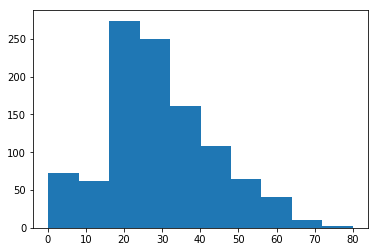

In [59]:
plt.hist(df["Age"].dropna())

In [60]:
df[df["Age"].isnull()]

,index,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,...,data,Deck,B,C,D,E,F,G,N,T
5,5,NaN,NaN,Q,8.458300,"Moran, Mr. James",0,6,3,male,...,train,N,0,0,0,0,0,0,1,0
17,17,NaN,NaN,S,13.000000,"Williams, Mr. Charles Eugene",0,18,2,male,...,train,N,0,0,0,0,0,0,1,0
19,19,NaN,NaN,C,7.225000,"Masselmani, Mrs. Fatima",0,20,3,female,...,train,N,0,0,0,0,0,0,1,0
26,26,NaN,NaN,C,7.225000,"Emir, Mr. Farred Chehab",0,27,3,male,...,train,N,0,0,0,0,0,0,1,0
28,28,NaN,NaN,Q,7.879200,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,female,...,train,N,0,0,0,0,0,0,1,0
29,29,NaN,NaN,S,7.895800,"Todoroff, Mr. Lalio",0,30,3,male,...,train,N,0,0,0,0,0,0,1,0
31,31,NaN,B78,C,146.520798,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,32,1,female,...,train,B,1,0,0,0,0,0,0,0
32,32,NaN,NaN,Q,7.750000,"Glynn, Miss. Mary Agatha",0,33,3,female,...,train,N,0,0,0,0,0,0,1,0
36,36,NaN,NaN,C,7.229200,"Mamee, Mr. Hanna",0,37,3,male,...,train,N,0,0,0,0,0,0,1,0
42,42,NaN,NaN,C,7.895800,"Kraeff, Mr. Theodor",0,43,3,male,...,train,N,0,0,0,0,0,0,1,0


In [61]:
# df.Age = df[df.data == "train"].Age.median()
df["Age"].fillna(df.Age.median(),inplace=True)

# scikit-learn

In [62]:
df.columns

Index(['index', 'Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch',
       'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'data',
       'Deck', 'B', 'C', 'D', 'E', 'F', 'G', 'N', 'T'],
      dtype='object')

In [72]:
df = df[["PassengerId","Fare","Age","Parch","Pclass","SibSp","Survived","data","male","Q","S"]]

train_data = df[df.data =="train"]
test_data = df[df.data == "test"]

xs = train_data[['Age',"Fare", 'Parch', 'Pclass', 'SibSp','male', 'Q', 'S']]
y = train_data["Survived"]

xs_test = test_data[['Age',"Fare", 'Parch', 'Pclass', 'SibSp','male', 'Q', 'S']]

In [73]:
forest = RandomForestClassifier(n_estimators = 100)
forest = forest.fit(xs,y)

# df_test["Age"].fillna(df.Age.median(),inplace=True)
output = forest.predict(xs_test)

In [74]:
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [75]:
xs.isnull().sum()

Age       0
Parch     0
Pclass    0
SibSp     0
male      0
Q         0
S         0
B         0
C         0
D         0
E         0
F         0
G         0
N         0
T         0
dtype: int64

In [76]:
xs_test.isnull().sum()

Age       0
Parch     0
Pclass    0
SibSp     0
male      0
Q         0
S         0
B         0
C         0
D         0
E         0
F         0
G         0
N         0
T         0
dtype: int64

In [77]:
test_data["Survived"] = output.astype(int)

/Users/takizawa/dev/python/kaggle/titanic/lib/python3.4/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [78]:
test_data[["PassengerId","Survived"]].to_csv("./output/201707201405.csv",index=False)